 #  Установка пакетов: pandas, seaborn, sklearn / + imblearn / + ipython
✅**Pandas**: дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным и при наличии  matplotlib дает возможность рисовать графики на полученных наборах данных.

✅**Seaborn**: библиотека для создания статистических графиков на Python. Основывается на matplotlib и  взаимодействует со структурами данных pandas

✅**Sklearn**: лгоритмы классификации, регрессии и кластеризации и позволяет взаимодействовать с другими библиотеками численного моделирования - Pandas, NumPy, Scipy.

✅**imblearn**: использ. для ребалансировки несбалансированных классов

In [1]:
!pip install -q pandas
!pip install -q seaborn
!pip install -q sklearn
!pip install -q scikit-learn

!pip install -q imblearn

!pip install -q ipython

# Подключение пакетов: 
✅**Numpy** - Одномерные и многомерные массивы (array) (матрицы, векторы

✅**Pandas** - таблицы и временные ряды (dataframe, series)

✅**Matplotlib.pyplot** - научная графика

✅**Seaborn** - больше красивой графики для визуализации данных

✅**IPython** - загрузка картинки

In [79]:
import numpy as np             
import pandas as pd         
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from imblearn.over_sampling import SMOTE

from IPython.display import Image

# ❗❗❗ Д/з к 9.11.2023 ❗❗❗

# 0) Описание задачи:
🍏Задан набор данных переписи и поставлена задача классификации прогнозов заработной платы   
Будем использовать имеющиеся данные, чтобы предсказать: заработная плата человека  ≤50тыс. или больше.

🍏Ссылка на датасет: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

🍏Задача классификации: 2 класса (прогноизруемая заработная плата   ≤50тыс. или >50тыс.

🍏 Далее описание признаков: ...

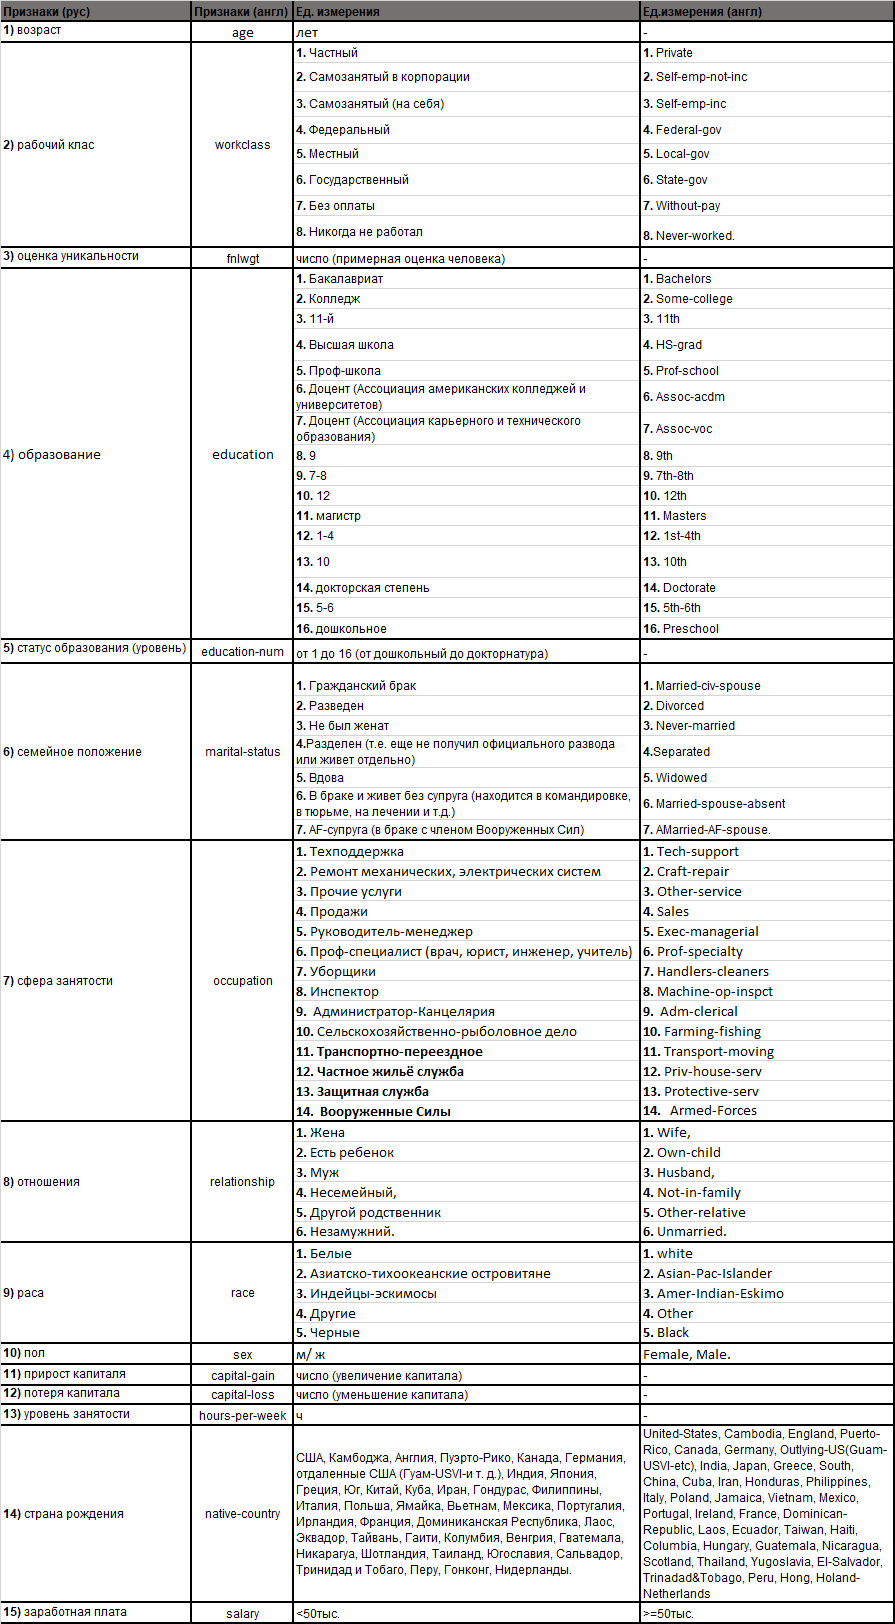

In [3]:
Image("C:/Users/Dmitriy/Desktop/ML/MachineLearning_m/DescriptionData.png", width = 895, height = 1656)

# 1) Считывание данных:

### 1.0. Считаем данные из файла "salary.csv":

In [4]:
data_row = pd.read_csv('salary.csv', delimiter=",", skiprows=[])

### 1.1. Выведем начало и конец таблицы на экран для наглядности.

data_row: показать 5 первых и последних строк  
data_row.shape: количество строк и столбцов

In [5]:
data_row

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Объектов**: 32561  
**Признаки**:  15 

### 1.2. Список признаков и их описания.

data_row.dtypes: типы данных каждого признака 

In [6]:
data_row.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Типы данных:** 6 int64, 9 object  

| Признаки (англ)| Признаки (рус)    | тип данных|
|:---------------|:------------------|:----------|
|age             |возраст            | int64     |
|kclass          |рабочий класс      | object    |
|fnlwgt          |оценка уникальности| int64     |
|education       |образование        | object    |
|education-num   |уровень образования| int64     |
|marital-status  |семейное положение | object    |
|occupation      |сфера занятости    | object    |
|relationship    |семейная роль      | object    |
|race            |раса               | object    |
|sex             |пол                | object    |
|capital-gain    |прирост капиталя   | int64     |
|capital-loss    |потеря капитала    | int64     |
|hours-per-week  |уровень занятости  | int64     |
|native-country  |страна рождения    | object    | 
|salary          |заработная плата   | object    |




## 2)  Визуализация данных, вычисление основных характеристик, интерпретация
### а. среднее b. разброс c. корреляционная матрица


### 2.1. Числовые признаки

**Всего числовых признаков:**  6
1. age
2. fnlwgt
3. education-num
4. capital-gain
5. capital-loss
6. hours-per-week

**Выведем их:**

In [7]:
numeric_parameters = [column for column in data_row.columns if data_row[column].dtype.name != 'object']
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

**Их основыне числ хар-ки:**
1. Количество (count)
2. Медиана (mean)
3. Среднеквадратическое отклонение (std)
4. Минимум (min)
5. Квантиль уровня 1/4 (25%)
6. Квантиль уровня 3/4 (75%)
7. Максимум (max)

In [8]:
data_row.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Итог:**
1. Возраст опрошенных (age): от 17 лет до 90
2. В среднем люди работаю 40ч в неделю (что похоже на правду) 
3. Странно, что для capital-gain и capital-loss min, 25%, 50% и 75% равны нулю. Скорее, всего это связано с тем, что большинство опрошенных не имеют таких доходов или потерь.


### 2.2. Категориальные признаки

**Всего категориальных признаков:** 9

1. Рабочий класс (workclass)
2. Образование (education)
3. Семейное положение (marital-status)
4. Сфера занятости (occupation)
5. Отношения (relationship)
6. Раса (race)
7. Пол (sex)
8. Страна рождения (native-country)
9. Зарпалата (salary)

**Выделим их:**

In [9]:
category_parameters = [column for column in data_row.columns if data_row[column].dtype.name == 'object']
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

**Рассмотрим их распределения:**

**1. Рабочий класс (workclass)**

In [10]:
data_row['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

**Пропущенные значений среди workclass (?):** 1836  

**2. Образование (education)**

In [11]:
data_row['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

**Пропущенные значений среди education (?):** 0  

**3. Семейное положение (marital-status)**

In [12]:
data_row['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

**Пропущенные значений среди marital-status (?):** 0  

**4. Сфера занятости (occupation)**

In [13]:
data_row['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

**Пропущенные значений среди occupation (?):** 1843

**5. Образование (education)**

In [14]:
data_row['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

**Пропущенные значений среди education (?):** 0

**6. Отношения (relationship)**

In [15]:
data_row['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

**Пропущенные значений среди relationship (?):** 0

**6. Раса (race)**

In [16]:
data_row['race'].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

**Пропущенные значений среди race (?):** 0

**7. Пол (sex)**

In [17]:
data_row['sex'].value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

**Пропущенные значений среди sex (?):** 0

**8. Страна рождения (native-country)**

In [18]:
data_row['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

**Пропущенные значений среди country (?):** 583

**9. Зарплата (salary)**

In [19]:
data_row['salary'].value_counts()

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

**Пропущенные значений среди salary:** 0

**Итог:**    
1. Пропущенные значения: 4262 ~ 13.09%  
- workclass: 1836; 
- occupation: 1843; 
- native-country: 583)    
2. Проанализировали распределение каждого категориального признака среди доступных значений.
3. Среди опрошенных людей: мужчин встречается в два раза больше, чем женщин.
4. Распределение уровней зарплат среди опрошенных составляет 24,720 примеров с низким уровнем зарплаты и 7,841 пример с высоким уровнем зарплаты.

### 3) Обработка пропущенных значений

**Прежде чем продолжить визуализировать данные:** избавимся от пропущенных значений, а затем вернемся к пункту 2.

Заменим пропущенные значения признаков workclass, occupation, native-country на NaN и подсчитаем их количество

In [20]:
data_row['workclass'].replace(' ?', np.nan, inplace=True)
data_row['occupation'].replace(' ?', np.nan, inplace=True)
data_row['native-country'].replace(' ?', np.nan, inplace=True)

data_row.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

**Пропущенные значения (для всех признаков):** 4262 ~ 13.09%     
1. workclass (рабочий класс): 1836
2. occupation (сфера занятости): 1843
3. native-country (страна рождения): 583

**Способ заполнения пропущ. зн-ий:**    
Заполним пропущенные данные наиболее популярными значения среди данного признака  
**(Замечание)**  
Пропущенное количество значений у признаков "workclass" (рабочий класс) и "occupation" (сфера занятости) примерно одинаковое. Это может указывать на связь между этими признаками. Если признак "workclass" отсутствует, то также отсутствует и признак "occupation". Мы можем найти наиболее распространенное значение для признака "workclass" и затем выбрать соответствующее популярное значение для признака "occupation", сохраняя найденное популярное значение признака "workclass".

**1. Признак workclass (рабочий класс):**

In [21]:
data_row['workclass'].mode()[0]

' Private'

**Популярное значение workclass (рабочий класс):** private (частник)

**2. Признак occupation ((сфера занятости)):**

In [22]:
data_row['occupation'][data_row['workclass'] == data_row['workclass'].mode()[0]].mode()[0]   

' Craft-repair'

**Популярное значение occupation (сфера занятости):** Craft-repair (ремонт механических/ электрических систем)

**3. Признак native-country (страна рождения):**

In [23]:
data_row['native-country'].mode()[0]

' United-States'

**Популярное значение native-country (страна рождения):** United-States

**!!! Теперь заменим пропуски:**

In [24]:
data_row['workclass'].fillna(data_row['workclass'].mode()[0], inplace=True)
data_row['occupation'].fillna(data_row['occupation'][data_row['workclass'] == data_row['workclass'].mode()[0]].mode()[0], inplace=True)
data_row['native-country'].fillna(data_row['native-country'].mode()[0], inplace=True)

**Проверим, что избавились от пропущенных значений:**

In [25]:
data_row.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**Пропущенных значений среди числовых и категориальных признаков:** нет

**(Замечание)**  
Для борьбы с пропущенными значениями, нельзя удалять пропущенные данные из-за их недостатка, поскольку это может привести к ошибкам и неточностям при последующем анализе и предсказаниях.

**(Замечание)**  
Вернемся к п.2. и визуализируем данные 

## 2)  ПРОДОЛЖЕНИЕ: Визуализация данных, вычисление основные характеристики, интерпретация
### а. среднее b. разброс c. корреляционная матрица


### 2.3. Визуализация данных:

**с. корреляционная матрица** 

In [26]:
numeric_cols = data_row.select_dtypes(include=['int', 'float']).columns
corr_matrix = data_row[numeric_cols].corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


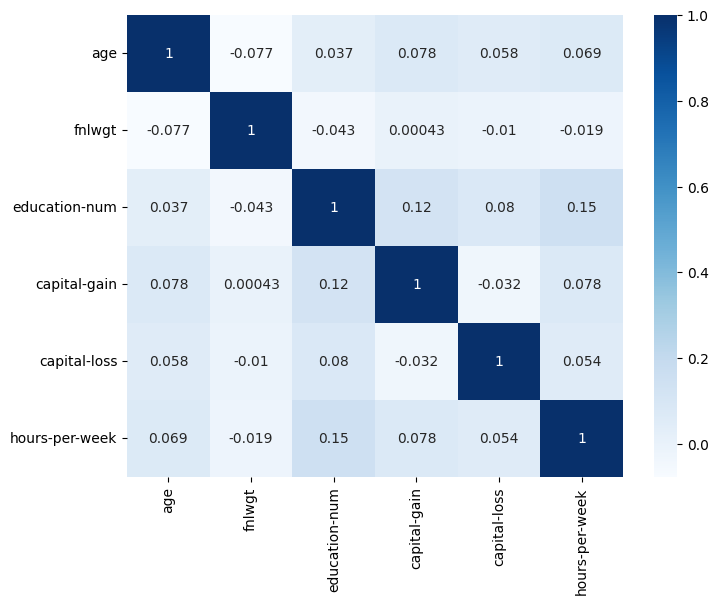

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

**Итог:** признаки практически не коррелируют друг с другом

**1. Распределение зп в зависимости от рабочемго класса (workclass):** 

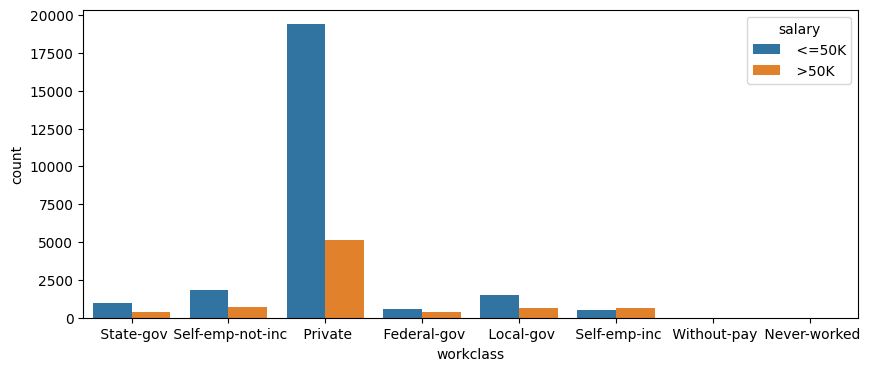

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data_row, x='workclass', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Видим, для какого рабочего класса, сколько людей получают зарплату  <=50тыс или >50тыс
2. Большое количество людей-частников (private) среди рабочего класа получают >50тыс (т.е. среди них много людей с зп >50 тыс.)
3. Среди опрошенных для значения "самозанятый в корпорации" (self-emp-inc) людей с зп >50тыс. больше, чем людей с зп ≤50тыс.

**2. Распределение зп в зависимости от ур. образования (education):** 

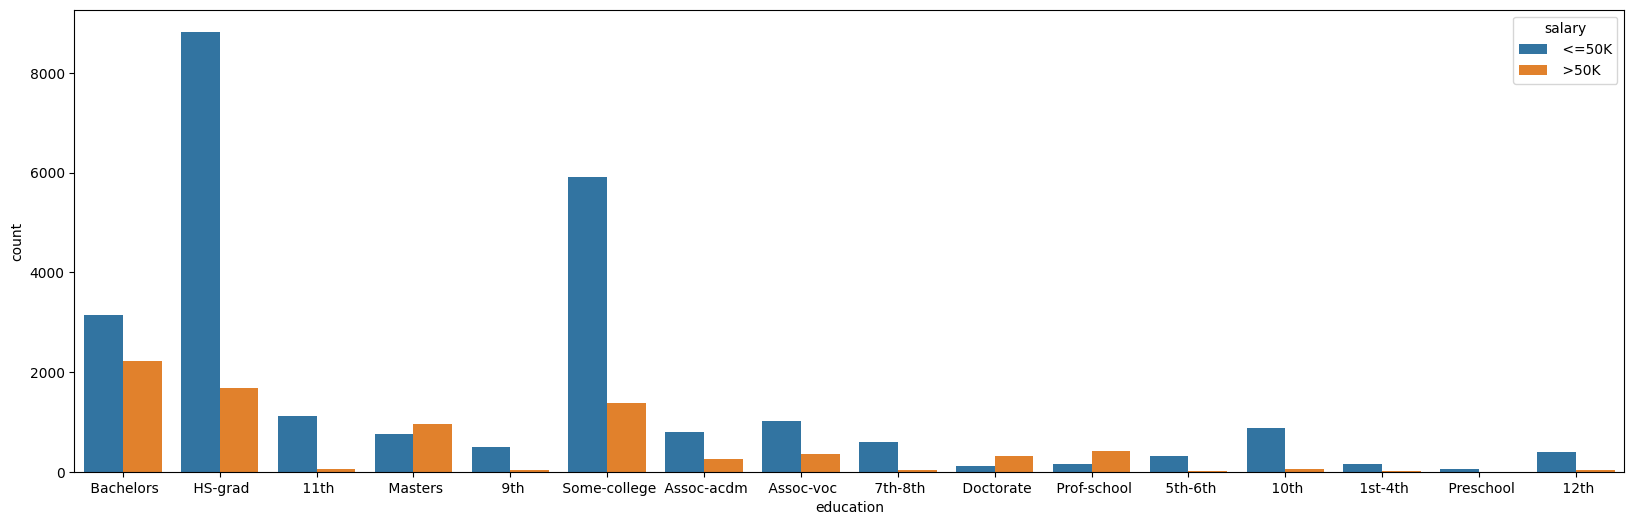

In [29]:
plt.figure(figsize=(20, 6))
sns.countplot(data=data_row, x ='education', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Высокий уровень образования является важным фактором, связанным с заработной платой.  
2. Большинство людей, получающих  >50тыс., имеют образование от высшей школы или колледжа до магистратуры.

**3. Распределение зп в зависимости от семейного положения (marital-status):** 

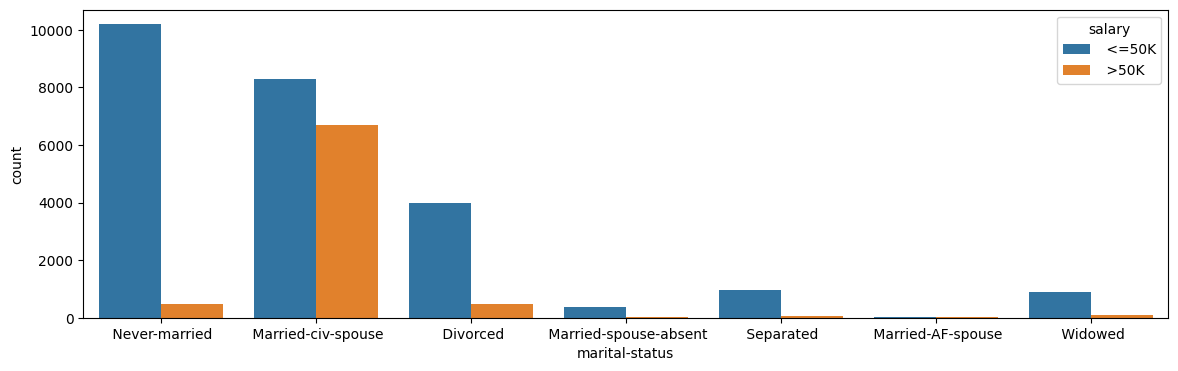

In [30]:
plt.figure(figsize = (14, 4))
sns.countplot(data = data_row, x ='marital-status', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Много людей с зп >50тыс среди тех, кто находится в гражданском браке (married-civ-spouse)
2. По сранвению с опрошенными в в гражданском браке (married-civ-spouse) - людей из других значений этого признака и с зп ≤50тыс. очень мало

**4. Распределение зп в зависимости от отношений (relationship):** 

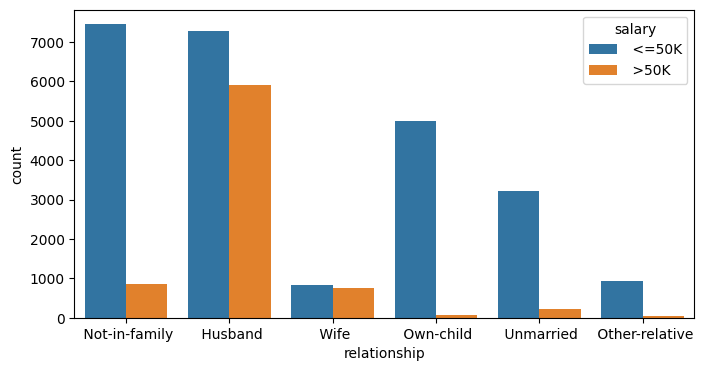

In [31]:
plt.figure(figsize = (8, 4))
sns.countplot(data = data_row, x ='relationship', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Много людей со значением "муж" (Husband) имеют высокую зп (>50 тыс.)
2. Для людей со значением "жена" (wife) примерно одинаковое количество женщин с зп ≤50 тыс. и >50тыс.
3. Среди людей с одним ребенком мало у кого, зп >50тыс.
4. Как было отмечено раннее, люди не в браке в основном с зп ≤50тыс.

**5. Распределение зп в зависимости от расы (race):** 

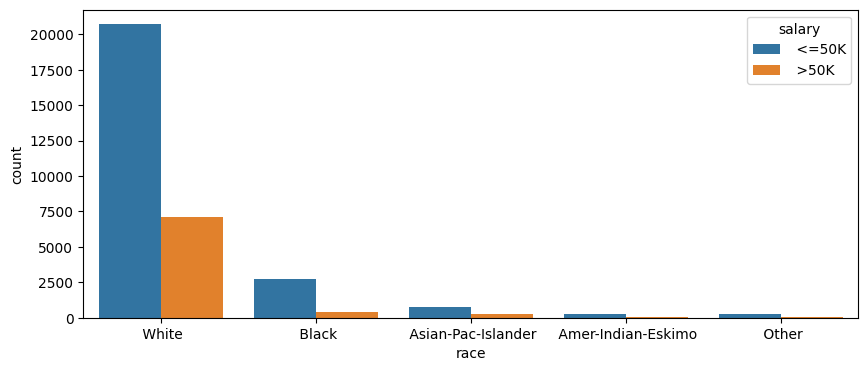

In [32]:
plt.figure(figsize = (10, 4))
sns.countplot(data = data_row, x ='race', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Много людей со значением "белый" (white) имеют высокую зп (>50 тыс.)
2. В остальных расах зп маленькая ( ≤50тыс.)

**6. Распределение зп в зависимости от пола (sex):** 

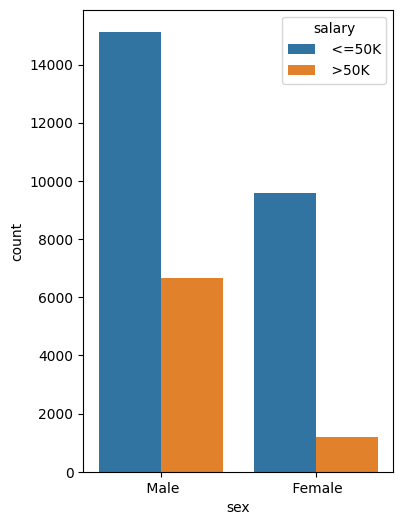

In [33]:
plt.figure(figsize = (4, 6))
sns.countplot(data = data_row, x ='sex', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. Мужчин (male) с зп >50тыс больше, чем таких женщин (female)

**7. Распределение зп в зависимости от прироста или потери капитала (capital-gain и capital-loss):** 

Данные характеристики не влияют на уровень заработной платы.  
Вероятно, это связано с тем, что для большинства объектов эти характеристики равны нулю (как было описанно раннее), поэтому они не предоставляют полезной информации для обучения модели

**8. Распределение зп в зависимости от возраста (age):** 

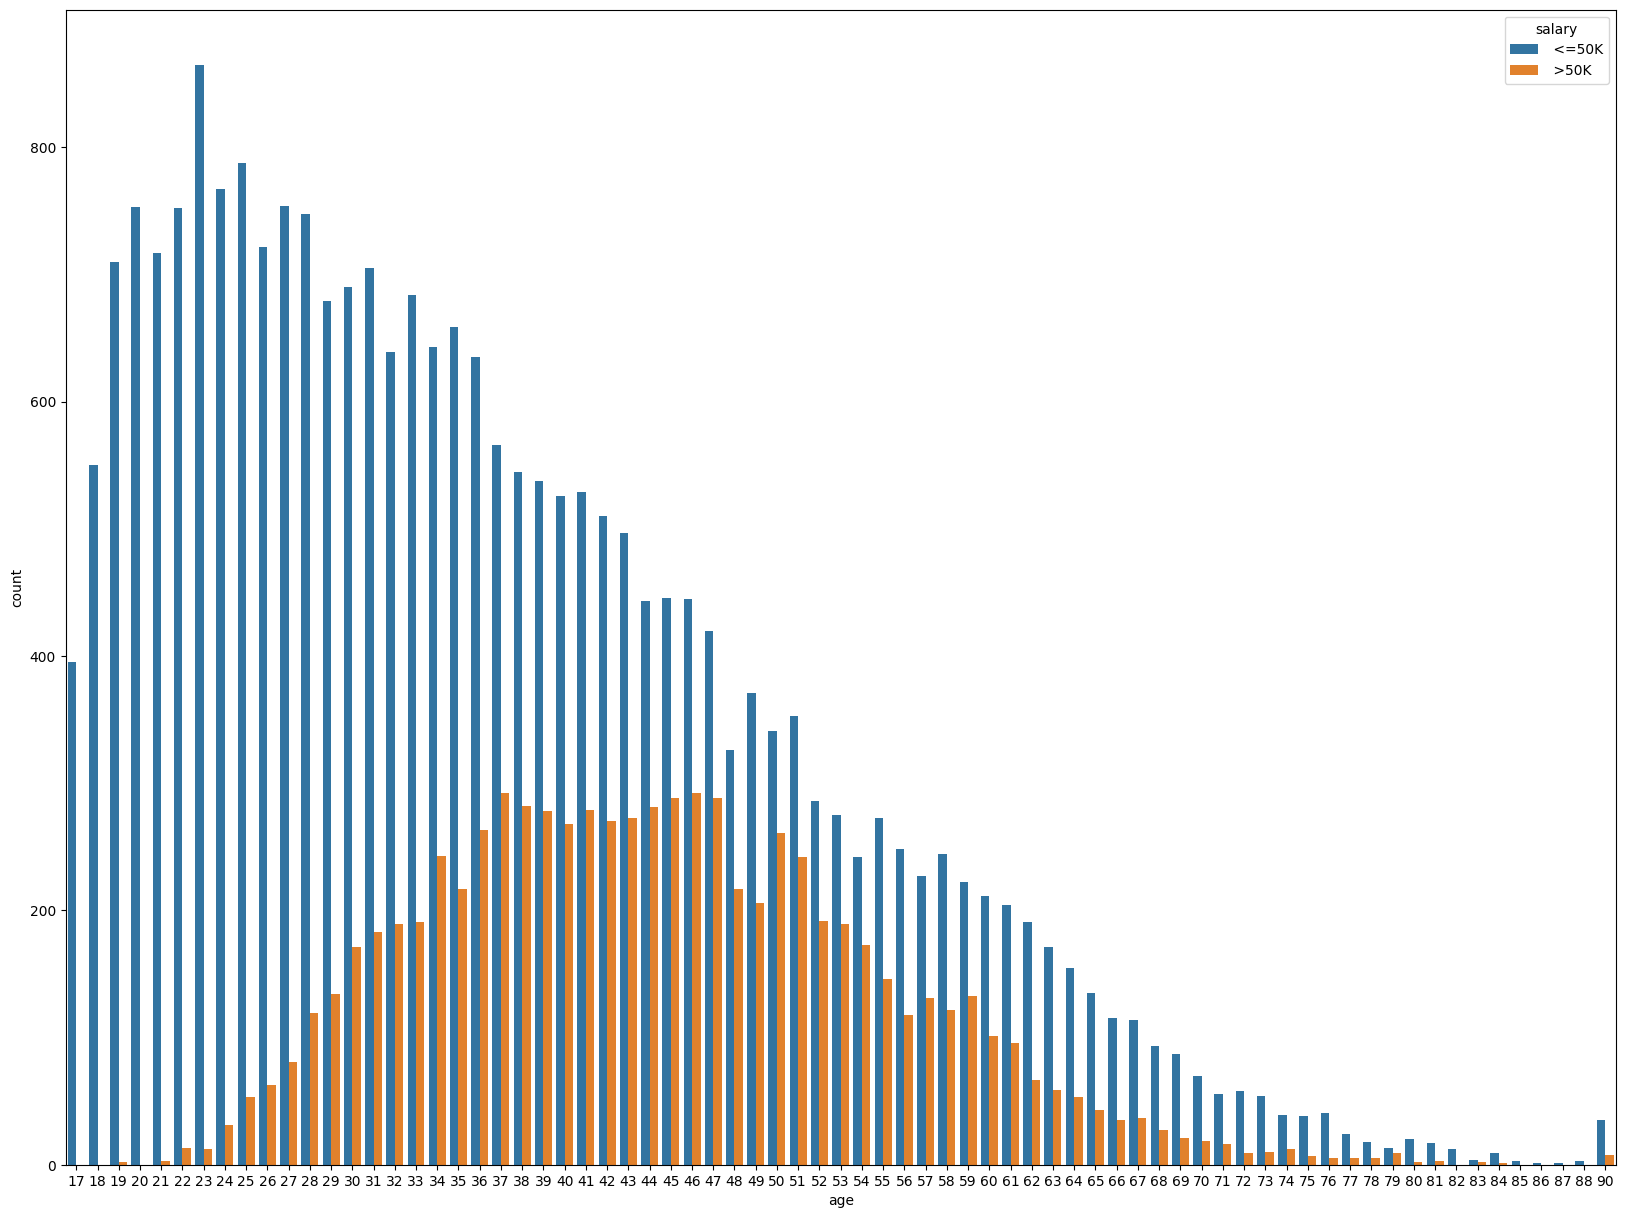

In [34]:
plt.figure(figsize=(20, 15))
sns.countplot(data=data_row, x='age', hue ='salary')
plt.show()

**Среди опрошенных:** 
1. В основном люди с зп >50тыс. - это люди с возрастом от 30 до 50 лет
2. Больше всего людей с зп >50тыс. от 37 до 47 лет.
3. К престарелому возрасту (примерно после 70 лет): зп примерно одинаковая и постепенно уменьшается.

# 4) Обработка категориальных признаков

### 4.1. Бинаризация: 

**а.** Среди всех категориальных признаков  бинарными являются признак "пол" и "заработная плата" (sex и salary). Убедимся в этом: 

In [35]:
bin_category_parameters = [column for column in category_parameters if len(data_row[column].unique()) == 2]
bin_category_parameters

['sex', 'salary']

**б.** Заменим представления признаков в Python с типа object на bool:

In [36]:
for column in bin_category_parameters:
  data_row[column] = data_row[column].map({data_row[column].unique()[0]: 0, data_row[column].unique()[1]: 1})

### 4.2. Векторизация:

**а.** Выделим признаки, которые нельзя классифицировать, как бинарные: 

In [37]:
Notbin_category_parameters = [column for column in category_parameters if column not in bin_category_parameters]
Notbin_category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

**К таким признакам относятся:** 
1. рабочий класс (workclass)
2. образование (education)
3. семейное положение (marital-status)
4. сфера занятости (occupation)
5. отношения (relationship)
6. раса (race)
7. страна рождения (native-country)

**б.** Применим векторизацию к этим данным  

Для каждого категориального признака, который не является бинарным, заменим его на несколько новых булевых признаков, равное количеству возможных категорий этого признака.  

Для этого воспользуемся методом get_dummies из библиотеки Pandas.

In [38]:
data_row = pd.get_dummies(data_row, columns = Notbin_category_parameters, drop_first=True)

### 4.2.3.Итог преобразования: 

Выведем информацию о данных: 

In [39]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   sex                                         32561 non-null  int64
 4   capital-gain                                32561 non-null  int64
 5   capital-loss                                32561 non-null  int64
 6   hours-per-week                              32561 non-null  int64
 7   salary                                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  bool 
 9   workclass_ Never-worked                     32561 non-null  bool 
 10  workclass_ Private                

**Видим**: все категориальные признаки больше не тип.д object, а либо int64, либо bool

In [40]:
data_row.sex

0        0
1        0
2        0
3        0
4        1
        ..
32556    1
32557    0
32558    1
32559    0
32560    1
Name: sex, Length: 32561, dtype: int64

**Также:** признак "пол" (sex), который был определн, как бинаризуемый, теперь принимает значения 0/1, где  
**0 -** мужчина (Male)  
**1 -** женщина (FeMale)

In [41]:
data_row.salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

**Также:** признак "заработная плата" (salaty) тоже принимает значения 0/1, где  
**0 -** зарплата ≤50тыс.  
**1 -** зарплата >50тыс.

# 5) Нормализация (обработка числовых признаков)

1. Признак "статус образования" (education-num) является числовым представлением признака "образование" (education) с практически идентичными значениями. В признаке "статус образования" (education-num) значения просто упорядочены в соответствии с порядком значений, записанных в признаке "образование" (education), формируя числовую последовательность.
2. Т.к. признаки прироста и потери капитала (capital-gain и capital-loss) в основном имеют нулевые значения и похожи на выбросы, удалим эти значения

In [42]:
data_row.drop('fnlwgt', axis=1, inplace=True)
data_row.drop('education-num', axis=1, inplace=True)
data_row.drop('capital-gain', axis=1, inplace=True)
data_row.drop('capital-loss', axis=1, inplace=True)

## 5.1. Проведем нормализацию: 

Приведем значения числовым признаков к значения от 0 до 1 

**а.** Выделим сначала все числовые признаки из data_row

In [43]:
normalized_numeric_parameters = [column for column in data_row.columns if data_row[column].dtype.name != 'object']

**б.** Применим нормализацию (воспользуемся методом MinMaxScaler из scikit-learn)

In [44]:
scaler = MinMaxScaler()
data_row[normalized_numeric_parameters] = scaler.fit_transform(data_row[normalized_numeric_parameters])

**в.** Выведем основные хар-ки (убедимся, что значения нормализованные): 

In [45]:
data_row.describe()

,age,sex,hours-per-week,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.330795,0.402423,0.240810,0.064279,0.000215,0.753417,0.034274,0.078038,0.039864,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913762,0.002058,0.000491
std,0.186855,0.470506,0.125994,0.427581,0.245254,0.014661,0.431029,0.181935,0.268236,0.195642,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.280720,0.045316,0.022162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,1.000000,0.448980,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Итог:**  
Все числовые значения обработаны и нормированы

# 4-5) Сбалансированность: 

**Проверим признак "уровень зарплаты" (salary) на сбалансированность:**

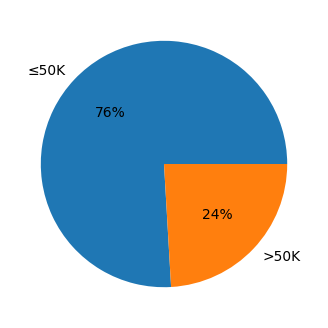

In [46]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette()

labels = ['≤50K', ">50K"]

plt.pie([data_row['salary'].value_counts()[0], data_row['salary'].value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

**Сбалансированность классов (salary):** 76%/24% (&le; 50тыс, >50тыс)  

Когда классы несбалансированы, это означает, что количество примеров в разных классах существенно отличается. 
1. Это может создавать проблемы при обучении модели 
2. Несбалансированные классы могут повлиять на производительность модели (например, если мы измеряем точность на несбалансированных данных, где большинство примеров относится к одному классу, модель может достичь высокой точности, просто предсказывая самый частый класс, не делая реальных предсказаний для редкого класса)

Поэтому при работе с несбалансированными классами может потребоваться необходимость в борьбе с ними  


**Мы можем решить проблему дисбаланса классов:** применим метод увеличения числа примеров миноритарного класса с помощью SMOTE (Synthetic Minority Over-sampling Technique ).  

Этот метод генерирует синтетические примеры для миноритарного класса, основываясь на соседстве существующих примеров. Он выбирает случайный пример из миноритарного класса и случайного соседа этого примера, а затем создает новый пример. Этот процесс повторяется для нескольких примеров миноритарного класса, пока не будет достигнуто желаемое увеличение его числа.

**a.** Применим вышеописанный метод

In [47]:
X = data_row.iloc[:, data_row.columns != 'salary']
y = data_row['salary']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

**б.** Посомтрим на результат: 

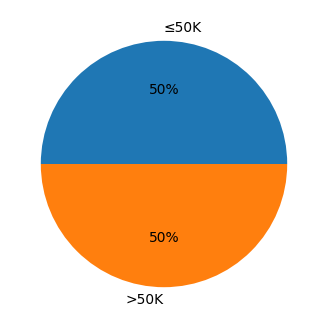

In [48]:
plt.figure(figsize = (4, 4))
colors = sns.color_palette()

labels = ['≤50K', ">50K"]

plt.pie([y_resampled.value_counts()[0], y_resampled.value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

**Теперь же:** классы являются сбалансированными

# 6) Разбиение данных на тестовую и обучающую выборку 

**Выполним разбиение данных на обучающую (train) и тестовую (test) выборки:** в соотношении 70/30% (обучающая выборка/ тестовая выборка)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=17)

In [50]:
X_train.shape[0]

34608

**Объектов в тренировочной выборке:** 34608

In [51]:
X_test.shape[0] 

14832

**Объектов в тестовой выборке:** 14832

# 7) Применение классификатора KNN

**Для классификации данной задачи применим метод KNN:**
1. KNN - вычислительно затратный метод для больших наборов данных, но у нас не так много данных, поэтому можем использовать и его
2. KNN прост в реализации
3. KNN предоставляет интерпретируемые результаты, т.к. классификация основывается на примерах из тренировочного набора данных. Легко понять, какой класс был выбран и какие объекты сыграли роль в этом решении.

**а.** Пусть k = 1:

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.9740233472029588, 0.8315803667745415)

**Точность (Accuracy) на обучающей выборке:** 0.9748613037447988   
**Точность (Accuracy) на тестовой выборке:** 0.8367044228694714

**б.** Пусть k = 2:

In [53]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.92334142394822, 0.8056903991370011)

**Точность (Accuracy) на обучающей выборке:** 0.9221856218215442   
**Точность (Accuracy) на тестовой выборке:** 0.8041396979503775

**в.** Пусть k = 3:

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.9070735090152566, 0.8335355987055016)

**Точность (Accuracy) на обучающей выборке:** 0.9060910772075821   
**Точность (Accuracy) на тестовой выборке:** 0.837108953613808

**г.** Пусть k = 5

In [55]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.8793342579750347, 0.8323894282632147)

**Точность (Accuracy) на обучающей выборке:** 0.8800277392510403   
**Точность (Accuracy) на тестовой выборке:** 0.8305690399137001

**д.** Пусть k = 10

In [56]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.8504103097549699, 0.823826860841424)

**Точность (Accuracy) на обучающей выборке:** 0.8523462783171522   
**Точность (Accuracy) на тестовой выборке:** 0.8233549083063646

**е.** Пусть k = 15

In [57]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test) 

(0.8371185852981969, 0.8191747572815534)

**Точность (Accuracy) на обучающей выборке:** 0.8366562644475266  
**Точность (Accuracy) на тестовой выборке:** 0.8180285868392665

## 7.1) Вывод: 

**Таким образом, KNN показал наилучишй результат при запуске k = 1, 2, 3, 5, 10, 15:** при k = 3  
1. При k = 1 и k = 3 точность на тренировочйно выборке одинаковые, но на обучающей при k = 1 точность намного выше, чем на тестовой. Так, наблюдается большее переобучение
2. При k > 3 точность на тренировочной выборке убывает. Возможно k = 3 является оптимальным параметром
3. При k > 3 разница точности на обучающей и тестовой выборке становится все меньше, поэтому переобучение не наблюдается

# 8) Подбор оптимального параметра k для KNN

Ранее уже выяснили, что  k = 3, возможно оптимальный параметр для классификатор KNN.  

Запустим KNN для ралзличных k от 1 до 30, и проверим: так ли это 

In [58]:
scores = []

for i in range(1, 30, 1):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train, y_train)
     score_train = knn.score(X_train, y_train)
     score_test = knn.score(X_test, y_test)
     result = [i, score_train, score_test]
     scores.append(result)

scores

[[1, 0.9740233472029588, 0.8315803667745415],
 [2, 0.92334142394822, 0.8056903991370011],
 [3, 0.9070735090152566, 0.8335355987055016],
 [4, 0.8917013407304669, 0.8252427184466019],
 [5, 0.8793342579750347, 0.8323894282632147],
 [6, 0.8716481738326398, 0.8316477885652643],
 [7, 0.8621705963938974, 0.8276024811218986],
 [8, 0.8580674988441979, 0.8257146709816613],
 [9, 0.8516239019879797, 0.8239617044228694],
 [10, 0.8504103097549699, 0.823826860841424],
 [11, 0.8449780397595932, 0.8211299892125135],
 [12, 0.845613730929265, 0.822680690399137],
 [13, 0.8406437817845585, 0.8197815533980582],
 [14, 0.8413950531668978, 0.8220064724919094],
 [15, 0.8371185852981969, 0.8191747572815534],
 [16, 0.8389100785945446, 0.818702804746494],
 [17, 0.83541377716135, 0.8169498381877023],
 [18, 0.8360783633841886, 0.8182982740021575],
 [19, 0.8336800739713361, 0.8160733549083063],
 [20, 0.8344024503005085, 0.8185005393743258],
 [21, 0.8313106796116505, 0.8155339805825242],
 [22, 0.831166204345816, 0.817

**Оптимальное значение параметра k:** 3  
**Точность (Accuracy) на обучающей выборке:** 0.9060910772075821   
**Точность (Accuracy) на тестовой выборке:** 0.837108953613808

# 9. Ошибки на обуч. и тестовой выборках 

## 9.1. Обучающая выборка: 

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
     
y_train_predict = knn.predict(X_train)
knn_accuracy_train = accuracy_score(y_train_predict, y_train)
knn_err_train = 1 - knn_accuracy_train
print(f"Accuracy = {knn_accuracy_train}\nError = {knn_err_train}")

Accuracy = 0.9070735090152566
Error = 0.09292649098474337


**Точность (Accuracy)** = 0.9060910772075821   
**Ошибка (Error)** = 0.09390892279

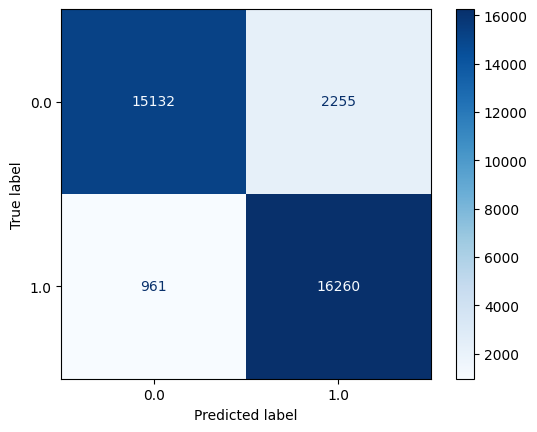

In [60]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, cmap ='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 15100  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 16258

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 963  
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 16258

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

## 9.2. Тестовая выборка: 

In [61]:
y_test_predict = knn.predict(X_test)
knn_accuracy_test = accuracy_score(y_test_predict, y_test)
knn_err_test = 1 - knn_accuracy_test
print(f"Accuracy = {knn_accuracy_test}\nError = {knn_err_test}")

Accuracy = 0.8335355987055016
Error = 0.16646440129449835


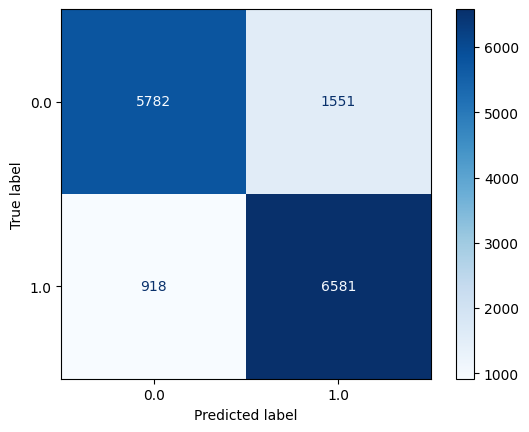

In [62]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap ='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 5776  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 6640

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 859  
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1557

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# 🚫 10. (По желанию) Запустить другие классификаторы, сравнить результаты

# 11. (По желанию) Борьба с несбалансированностью (см. п. 4-5)

# 12. (По желанию) Исключить коррелированные переменные

**Как было исследовано ранее:** коррелированных перменных нет  
(см. п. "2) ПРОДОЛЖЕНИЕ: Визуализация данных, вычисление основные характеристики, интерпретация")

# 13. Общие выводы: 

В процессе работы мы использовали различные методы для обработки данных и их визуализации.  
Затем мы применили метод K-Nearest Neighbors (KNN) с различными значениями параметра k.   
В результате было обнаружено, что оптимальное значение k для данной модели равно 3.

При k = 3 KNN показал следущие результаты:  
**Точность (Accuracy) на обучающей выборке:** 0.9060910772075821   
**Точность (Accuracy) на тестовой выборке:** 0.837108953613808  

На обучающей выборке:   
**Число правильно классифицированных положительных объектов:** опрошенный получает ≤50 тыс - 15100  
**Число правильно классифицированных отрицательных объектов:**  опрошенный получает >50 тыс - 16258   
**Число неправильно классифицированных положительных объектов:** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 963  
**Число неправильно классифицированных отрицательных объектов:**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 16258

На тестовой выборке:   
**Число правильно классифицированных положительных объектов:** опрошенный получает ≤50 тыс - 5776  
**Число правильно классифицированных отрицательных объектов:**  опрошенный получает >50 тыс - 6640  
**Число неправильно классифицированных положительных объектов:** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 859  
**Число неправильно классифицированных отрицательных объектов:**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1557

0. ✅ Описана задача
1. ✅ Прочитаны данные
2. ✅ Визуализированы данные и вычислены основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Данные проинтепретированны.
3. ✅ Обработаны пропущенные значения 
4. ✅ Обработаны категориальные признаки
5. ✅ Проведена нормализацию 
6. ✅ Разбиты данные на обучающую и тестовую выборки в соотношении 70/30%
7. ✅ Запущен классификатор  ближайших соседей 
8. ✅ Подобрано оптимальное значение к-ва ближайших соседей
9. ✅ Вычислена ошибка на обучающей и тестовой выборках
10. 🚫 (По желанию): запустить другие классификаторы. Сравнить результаты 
11. ✅ По желанию: борьба несбалансированностью классов
12. ✅ По желанию: обработка коррелированных переменных 

# ❗❗❗ Д/з к 28.12.2023 ❗❗❗

# 1. Логистическая регрессия

**Запустим** Логистическую регрессию для нашей задачи

In [71]:
logistRegr = LogisticRegression(max_iter=X_train.shape[0])
logistRegr.fit(X_train, y_train)

LogisticRegression(max_iter=34608)

**На обучающей выборке ошибка составляет:** 

In [75]:
y_train_predict = logistRegr.predict(X_train)
logistRegr_err_train = 1 - accuracy_score(y_train_predict, y_train)
logistRegr_err_train

0.1857374017568192

**На тестовой выборке ошибка составляет:** 

In [76]:
y_test_predict = logistRegr.predict(X_test)
logistRegr_err_test = 1 - accuracy_score(y_test_predict, y_test)
logistRegr_err_test

0.1848031283710896

**Посмотрим на ConfusionMatrix на тестовой выборке:**

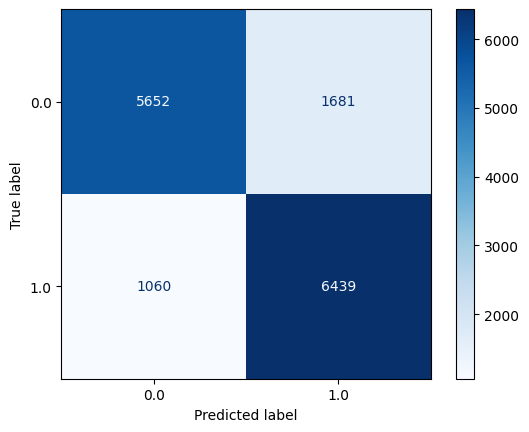

In [78]:
ConfusionMatrixDisplay.from_estimator(logistRegr, X_test, y_test, cmap='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 5652  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 6439

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 1060  
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1681

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# 2. RandomForest

**Запустим** RandomForest для нашей задачи

In [65]:
rf = RandomForestClassifier(n_estimators=800)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

**На обучающей выборке ошибка составляет:** 

In [66]:
y_train_predict = rf.predict(X_train)
rf_err_train = 1 - accuracy_score(y_train_predict, y_train)
rf_err_train

0.021208969024502977

**На тестовой выборке ошибка составляет:** 

In [68]:
y_test_predict = rf.predict(X_test)
rf_err_test = 1 - accuracy_score(y_test_predict, y_test)
rf_err_test

0.13861920172599784

**Посмотрим на ConfusionMatrix на тестовой выборке:**

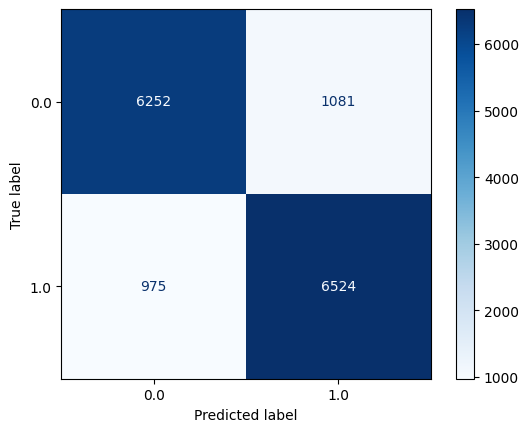

In [72]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 6252  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 6524

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 975  
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1081

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# 3. Полносвязная неглубокая (с одним скрытым слоем) нейронная сеть

**Запустим** MLP для нашей задачи с одним скрытым сорем и 100 нейронами

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

**На обучающей выборке ошибка составляет:** 

In [85]:
y_train_predict = mlp.predict(X_train)
mlp_err_train = 1-accuracy_score(y_train_predict, y_train)
mlp_err_train

0.12115695792880254

**На тестовой выборке ошибка составляет:** 

In [86]:
y_test_predict = mlp.predict(X_test)
mlp_err_test = 1-accuracy_score(y_test_predict, y_test)
mlp_err_test

0.1557443365695793

**Посмотрим на ConfusionMatrix на тестовой выборке:**

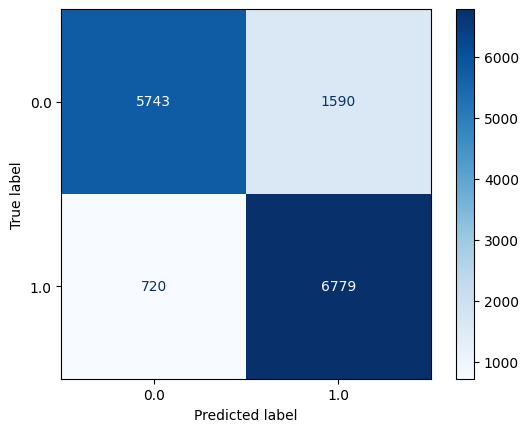

In [87]:
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 5743  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 6779

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 720  
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1590

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# 4. Подбор оптимального параметра α

## 4.1. Выполним подборпараметра α для нейронных сетей

In [92]:
train_acc = []
train_err = []
test_acc = []
test_err = []
alpha_arr = np.logspace(-3, 2, 21)

for alpha in alpha_arr:
    model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(100,), max_iter=500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    train_err.append(np.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    test_err.append(np.mean(y_test != y_test_pred))

**Оптимальное значение параметра α:**

In [100]:
opt_alpha = alpha_arr[test_err == np.min(test_err)][0]
opt_alpha

0.0017782794100389228

## 4.2. График зависимости ошибки от параметра  α

**Построим график зависимости ошибки от параметра  α** (красным цветом - обучающая выборка, синим - тестовая)

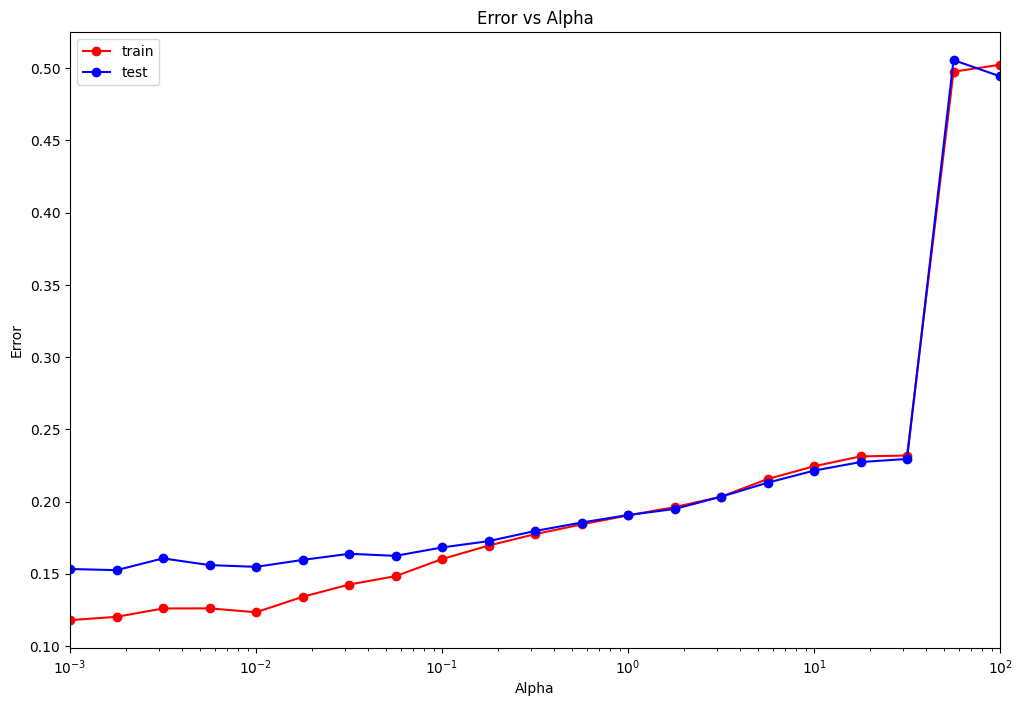

In [99]:
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_arr, train_err, "r-o", label="train")
plt.semilogx(alpha_arr, test_err, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()
pass

**Недообучения и переобучения** не наблюдается

## 4.3. Выполним классификацию с подобранным параметром α

In [101]:
mlp_with_alpha = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes=(100,), max_iter=500)
mlp_with_alpha.fit(X_train, y_train)

MLPClassifier(alpha=0.0017782794100389228, max_iter=500)

**На обучающей выборке ошибка составляет:** 

In [102]:
y_train_predict = mlp_with_alpha.predict(X_train)
mlp_err_train = 1 - accuracy_score(y_train_predict, y_train)
mlp_err_train

0.11682269995376793

**На тестовой выборке ошибка составляет:** 

In [103]:
y_test_predict = mlp_with_alpha.predict(X_test)
mlp_err_test = 1 - accuracy_score(y_test_predict, y_test)
mlp_err_test

0.15088996763754048

**Посмотрим на ConfusionMatrix на тестовой выборке:**

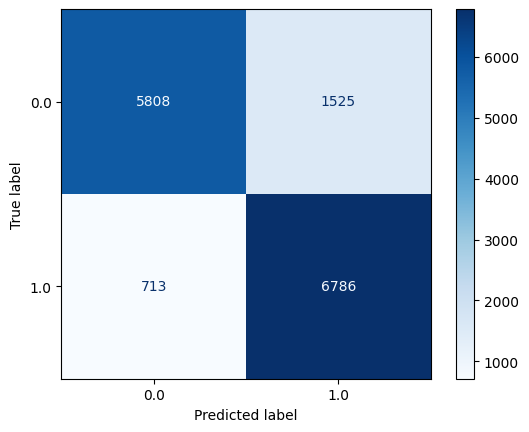

In [104]:
ConfusionMatrixDisplay.from_estimator(mlp_with_alpha, X_test, y_test, cmap='Blues')

**Число правильно классифицированных положительных объектов (TP):** опрошенный получает ≤50 тыс - 5808  
**Число правильно классифицированных отрицательных объектов (TN):**  опрошенный получает >50 тыс - 6786

**Число неправильно классифицированных положительных объектов (FN):** опрошенный получает ≤50 тыс, но предсказано >50тыс.  - 713   
**Число неправильно классифицированных отрицательных объектов (FP):**  опрошенный получает >50 тыс, но предсказано ≤50тыс. - 1525 

**FN**  классификатор неверно отнёс объект к рассматриваемому классу.  
**FP**  классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

# 5. Итоги:

**KNN** ошибка на обуч. выборке (с оптимальным параметром k): 0.09292649098474337  
**KNN** ошибка на тест. выборке (с оптимальным параметром k): 0.16646440129449835 

**LogisticRegression** ошибка на обуч. выборке: 0.1857374017568192  
**LogisticRegression** ошибка на тест. выборке: 0.1848031283710896  

**RandomForest** ошибка на обуч. выборке: 0.021208969024502977  
**RandomForest** ошибка на тест. выборке: 0.13861920172599784  

**MLP** ошибка на обуч. выборке (с оптимальным параметром α): 0.11682269995376793  
**MLP** ошибка на тест. выборке (с оптимальным параметром α): 0.15088996763754048  

**В результате проведенного исследования можно сделать следующие выводы:**
1. RandomForest имеет наибольшую точность предсказания на тестовой выборке (~86%).
2. RandomForestr имеет меньшую ошибку по точности предсказания на обучающей выборке (~2%)
3. LogisticRegression показывает наихудшие результаты  на обучающей и на тестовой выборке, и имеет ошибки больше, чем у других классификаторов.


**Ни одна модель не проявила признаков недообучения или переобучения** на протяжении всей работы